# The Genetic Algorithm

> Biomimicry is the emulation of the models, systems, and elements of nature for the purpose of solving complex human problems. The genetic algorithm, artificial neural networks, and the ant colony algorithm are some examples, to name a few.

[The world is poorly designed. But copying nature helps.](https://www.youtube.com/watch?v=iMtXqTmfta0)

For my first assignment for [Business Analytics](https://github.com/pilsung-kang/Business-Analytics-IME654-), I implemented the genetic algorithm using numpy as the main tensor calculator library, and sklearn for calculating fitness scores. The full Class can be found in `genetic_algorithm/GeneticAlgorithm.py`.

### 0. Data Loading
For this implementation of the genetic algorithm, I used a very famous toy dataset - [The Red Wine Quality Dataset.](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)


In [1]:
# %%
import numpy as np
import pandas as pd
import copy
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tqdm.notebook import tqdm
from GeneticAlgorithm import GeneticAlgorithm

GA = GeneticAlgorithm('winequality-red.csv', pop_size=50, num_generations=20, mutation_rate=0.01, crossover_rate=0.5)

In [2]:
class GeneticAlgorithm_Jupyter:
    def __init__(self, df, pop_size=10, num_generations=10, mutation_rate=0.01, crossover_rate=0.5):
        self.df = pd.read_csv(df)
        bins = (2, 5.5, 8)
        group_names = ['bad', 'good']
        target_var = 'quality'
        self.df[target_var] = pd.cut(self.df[target_var], bins = bins, labels = group_names)
        label_quality = LabelEncoder()
        self.df[target_var] = label_quality.fit_transform(self.df[target_var])
        self.data = self.df.drop(target_var, axis=1)
        self.target = self.df[target_var]

GA.df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


It consists of 11 variables that describe the target variable, being the quality of wine, ranging from scores 3 through 8. To change the given task to binary classification, I used the `pd.cut()` method to split wines with `quality` over 5.5 into `1`, and under into `0`.

### 1. Initialization

The genetic algorithm consists of multiple hyperparameters, including the number of chromosomes (population), the fitness function, crossover mechanism, and the mutation rate.

For this example, I set the hyperparameters as following:

In [3]:
GA = GeneticAlgorithm('winequality-red.csv', pop_size=50, num_generations=20, mutation_rate=0.01, crossover_rate=0.5)
print(GA)

GeneticAlgorithm(pop_size=50, num_generations=20, mutation_rate=0.01, crossover_rate=0.5)


The first step of GA is population initialization.

It refers to how many chromosomes are to be processed in one training iteration. For this example, I used a population size of 50, which in return accounts for 50 boolean arrays with 11 values, corresponding to the number of variables in the dataset.

In [4]:
def initialization(self):
    for i in range(self.pop_size):
        self.population.append(np.random.randint(2, size=len(self.var_names)).astype(bool))
    return self.population

GA.initialization()

[array([False, False,  True,  True, False,  True, False, False, False,
        False,  True]),
 array([ True, False, False, False, False, False, False,  True, False,
         True,  True]),
 array([ True,  True, False, False,  True,  True,  True,  True, False,
        False, False]),
 array([ True,  True,  True, False, False,  True,  True, False,  True,
         True, False]),
 array([False, False, False,  True, False, False,  True,  True,  True,
         True,  True]),
 array([False, False,  True,  True, False,  True,  True, False, False,
        False, False]),
 array([False, False,  True, False, False, False,  True, False, False,
         True,  True]),
 array([ True, False, False, False, False, False,  True,  True, False,
         True, False]),
 array([False, False, False, False,  True, False, False,  True, False,
         True, False]),
 array([ True, False, False, False, False,  True, False, False,  True,
         True,  True]),
 array([False,  True,  True, False,  True,  True, 

In [5]:
np.random.randint(2, size=len(GA.var_names)).astype(bool)

array([ True,  True, False, False, False, False, False,  True, False,
        True, False])

### 2. Fitness Evaluation

Once the population is initialized, fitness evaluation is performed for all chromosomes in the population.

For this example, I used a standard Random Forest classifier and its accuracy score.

In [6]:
def fitness_evaluation(self):
    if self.population:
        pass
    else:
        print('Initializing the first population..')
        self.population = self.initialization()
    
    acc_score = []
    for mask in tqdm(self.population, desc='Calculating Fitness Score..'):
        train_data = self.data[np.array(self.var_names)[mask]]
        x_train, x_test, y_train, y_test = train_test_split(train_data, self.target, test_size=0.2, random_state=0)
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.fit_transform(x_test)
        rfc = RandomForestClassifier(n_estimators=200)
        rfc.fit(x_train, y_train)
        pred_rfc = rfc.predict(x_test)
        acc = accuracy_score(y_test, pred_rfc)
        acc_score.append(acc)
    fitness_dict = {}
    count = 0
    for score in acc_score:
        fitness_dict[count] = score
        count += 1

    self.fitness_dict = fitness_dict
    self.best_chromosome.append(self.population[max(self.fitness_dict, key=self.fitness_dict.get)])
    self.best_chromosome_score.append(max(self.fitness_dict.values()))
    
    print(f'Best chromosome score: {self.best_chromosome_score[-1]}')
    return self.fitness_dict

GA.fitness_evaluation()

Best chromosome score: 0.809375


{0: 0.8,
 1: 0.765625,
 2: 0.7625,
 3: 0.765625,
 4: 0.80625,
 5: 0.684375,
 6: 0.778125,
 7: 0.740625,
 8: 0.709375,
 9: 0.7625,
 10: 0.734375,
 11: 0.653125,
 12: 0.7375,
 13: 0.7875,
 14: 0.790625,
 15: 0.75,
 16: 0.725,
 17: 0.75625,
 18: 0.740625,
 19: 0.73125,
 20: 0.80625,
 21: 0.728125,
 22: 0.796875,
 23: 0.746875,
 24: 0.8,
 25: 0.79375,
 26: 0.75625,
 27: 0.678125,
 28: 0.7625,
 29: 0.79375,
 30: 0.621875,
 31: 0.690625,
 32: 0.734375,
 33: 0.7,
 34: 0.70625,
 35: 0.7,
 36: 0.8,
 37: 0.684375,
 38: 0.765625,
 39: 0.8,
 40: 0.715625,
 41: 0.778125,
 42: 0.771875,
 43: 0.64375,
 44: 0.76875,
 45: 0.809375,
 46: 0.690625,
 47: 0.675,
 48: 0.575,
 49: 0.73125}

Each chromosome in the population is used to mask the variables used to train the RF model.

In [7]:
mask = GA.population[0]
train_data = GA.data[np.array(GA.var_names)[mask]]
train_data

,citric acid,residual sugar,free sulfur dioxide,alcohol
0,0.00,1.9,11.0,9.4
1,0.00,2.6,25.0,9.8
2,0.04,2.3,15.0,9.8
3,0.56,1.9,17.0,9.8
4,0.00,1.9,11.0,9.4
...,...,...,...,...
1594,0.08,2.0,32.0,10.5
1595,0.10,2.2,39.0,11.2
1596,0.13,2.3,29.0,11.0
1597,0.12,2.0,32.0,10.2


For the first chromosome, the RF model trains using only 6 variables.

For each generation, the accuracy from the RF model is calculated and stored in `self.fitness_dict`, and the chromosome with the highest accuracy is stored in `self.best_chromosome_score`.

In [8]:
GA.fitness_dict

{0: 0.8,
 1: 0.765625,
 2: 0.7625,
 3: 0.765625,
 4: 0.80625,
 5: 0.684375,
 6: 0.778125,
 7: 0.740625,
 8: 0.709375,
 9: 0.7625,
 10: 0.734375,
 11: 0.653125,
 12: 0.7375,
 13: 0.7875,
 14: 0.790625,
 15: 0.75,
 16: 0.725,
 17: 0.75625,
 18: 0.740625,
 19: 0.73125,
 20: 0.80625,
 21: 0.728125,
 22: 0.796875,
 23: 0.746875,
 24: 0.8,
 25: 0.79375,
 26: 0.75625,
 27: 0.678125,
 28: 0.7625,
 29: 0.79375,
 30: 0.621875,
 31: 0.690625,
 32: 0.734375,
 33: 0.7,
 34: 0.70625,
 35: 0.7,
 36: 0.8,
 37: 0.684375,
 38: 0.765625,
 39: 0.8,
 40: 0.715625,
 41: 0.778125,
 42: 0.771875,
 43: 0.64375,
 44: 0.76875,
 45: 0.809375,
 46: 0.690625,
 47: 0.675,
 48: 0.575,
 49: 0.73125}

### 3. Selection

Once fitness evaluation has been conducted for all chromosomes in the population, a selection criterion determines which chromosome in the population is fit enough to pass on its genes (e.g. its variables) to the next generation. 

In [9]:
def probabilistic_selection(self):
    if self.fitness_dict:
        pass
    else:
        self.fitness_dict = self.fitness_evaluation()
    fitness_score = list(self.fitness_dict.values())
    fitness_score = self.softmax(fitness_score)
    selection = np.random.choice(list(self.fitness_dict.keys()), self.pop_size, p=list(fitness_score), replace=True)
    parent_population = []
    elite = max(self.fitness_dict)
    parent_population.append(self.population[elite])
    for choice in selection[:-1]:
        parent_population.append(self.population[choice])
    
    self.parent_population = parent_population
    return self.parent_population

GA.probabilistic_selection()

[array([False,  True, False, False, False,  True, False,  True,  True,
         True, False]),
 array([ True, False, False, False,  True, False, False,  True, False,
        False,  True]),
 array([False, False,  True,  True, False,  True, False, False, False,
        False, False]),
 array([False,  True, False, False,  True,  True, False, False,  True,
         True, False]),
 array([ True, False, False, False,  True, False, False,  True, False,
        False,  True]),
 array([False, False, False,  True, False, False,  True,  True,  True,
         True,  True]),
 array([ True, False,  True,  True,  True, False, False, False, False,
         True, False]),
 array([ True, False, False,  True, False, False,  True,  True, False,
        False,  True]),
 array([False, False, False, False, False,  True, False,  True,  True,
         True,  True]),
 array([False,  True,  True, False,  True, False,  True, False, False,
        False, False]),
 array([ True,  True, False, False, False,  True, 

First, the values of the fitness scores are called into a list.

In [10]:
fitness_score = list(GA.fitness_dict.values())
fitness_score

[0.8,
 0.765625,
 0.7625,
 0.765625,
 0.80625,
 0.684375,
 0.778125,
 0.740625,
 0.709375,
 0.7625,
 0.734375,
 0.653125,
 0.7375,
 0.7875,
 0.790625,
 0.75,
 0.725,
 0.75625,
 0.740625,
 0.73125,
 0.80625,
 0.728125,
 0.796875,
 0.746875,
 0.8,
 0.79375,
 0.75625,
 0.678125,
 0.7625,
 0.79375,
 0.621875,
 0.690625,
 0.734375,
 0.7,
 0.70625,
 0.7,
 0.8,
 0.684375,
 0.765625,
 0.8,
 0.715625,
 0.778125,
 0.771875,
 0.64375,
 0.76875,
 0.809375,
 0.690625,
 0.675,
 0.575,
 0.73125]

Chromosome selection can be performed in 2 ways:

1. Deterministic selection
- Select only the top N% of chromosomes

2. Probabilistic selection
- Fitness score is used as a weight for each chromosome

I chose to implement probabilistic selection for this example, since it gives the chromosomes with low scores a slight chance to be selected, henece acquiring diversity.

I passed each score into the softmax function, which normalizes all fitness scores into a probability.

In [11]:
fitness_score = GA.softmax(fitness_score)
fitness_score

array([0.02120602, 0.02048945, 0.02042552, 0.02048945, 0.02133897,
       0.01889052, 0.02074717, 0.01998356, 0.01936873, 0.02042552,
       0.01985905, 0.01830932, 0.01992121, 0.02094259, 0.02100814,
       0.02017179, 0.01967374, 0.02029826, 0.01998356, 0.01979709,
       0.02133897, 0.01973532, 0.02113985, 0.02010885, 0.02120602,
       0.02107389, 0.02029826, 0.01877282, 0.02042552, 0.02107389,
       0.017746  , 0.01900895, 0.01985905, 0.019188  , 0.0193083 ,
       0.019188  , 0.02120602, 0.01889052, 0.02048945, 0.02120602,
       0.01949016, 0.02074717, 0.02061791, 0.01813847, 0.02055358,
       0.02140576, 0.01900895, 0.01871424, 0.01693335, 0.01979709])

I used the `np.random.choice()` method to sample each chromosome **With Replacement**, using the softmax values of the fitness score as the probability for each chromosome to be sampled.

In [12]:
selection = np.random.choice(list(GA.fitness_dict.keys()), GA.pop_size, p=list(fitness_score), replace=True)
selection

array([43, 10, 45, 27, 15, 13, 28, 12, 17, 39, 25, 49,  6, 10, 28, 26, 17,
        2,  2, 15,  6, 23, 20,  9,  1, 36, 18, 31, 23, 23, 46,  3, 27, 43,
       35,  1,  2, 36,  1, 49, 38, 25, 27,  3,  7,  9, 13, 34,  5, 23])

A good practice in the genetic algorithm is to implement **Elitism**.

For each generation, there is no guarantee that the children chromosomes are better than their respective parent chromosomes. So for safety, N chromosomes with the best fitness scores are deterministicly selected in the selection process.

For my example, I chose `elitism = 1`, which means that the chromosome with the best fitness score in its population is guaranteed to be passed on.

In [13]:
parent_population = []
elite = max(GA.fitness_dict)
print(elite)

parent_population.append(GA.population[elite])
for choice in selection[:-1]:
    parent_population.append(GA.population[choice])

49


### 4. Crossover

Once the parent chromosomes have been chosen either through deterministic or probabilistic selection, 2 parent chromosomes exchange their genes in order to produce 2 child chromosomes.

The crossover point, a hyperparameter, determines the number of "slices" that are made in the parent chromosome. However, it is considered good practice to use `crossover_rate` instead of `crossover_point`.

Crossover rate determines the probability of gene crossover given to the parent chromosomes' genes. For my example, I used `crossover_rate=0.5` meaning that each gene has a 50% chance of crossing over.

In [14]:
def crossover(self):
    if self.parent_population:
        pass
    else:
        self.parent_population = self.probabilistic_selection()

    crossover_population = []
    for i in range(0, len(self.parent_population), 2):
        if np.random.rand() < self.crossover_rate:
            crossover_point = np.random.randint(1, len(self.var_names) - 1)
            parent1 = self.parent_population[i]
            parent2 = self.parent_population[i + 1]
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            crossover_population.append(child1)
            crossover_population.append(child2)
        else:
            crossover_population.append(self.parent_population[i])
            crossover_population.append(self.parent_population[i + 1])
    
    self.crossover_population = crossover_population
    self.before_mutation = copy.deepcopy(self.crossover_population)
    return self.crossover_population

GA.crossover()

[array([False,  True, False, False,  True, False, False,  True, False,
        False,  True]),
 array([ True, False, False, False, False,  True, False,  True,  True,
         True, False]),
 array([False, False,  True,  True, False,  True, False, False, False,
        False, False]),
 array([False,  True, False, False,  True,  True, False, False,  True,
         True, False]),
 array([ True, False, False, False,  True, False, False,  True, False,
        False,  True]),
 array([False, False, False,  True, False, False,  True,  True,  True,
         True,  True]),
 array([ True, False,  True,  True,  True, False, False, False, False,
         True, False]),
 array([ True, False, False,  True, False, False,  True,  True, False,
        False,  True]),
 array([False,  True,  True, False,  True, False,  True, False, False,
        False, False]),
 array([False, False, False, False, False,  True, False,  True,  True,
         True,  True]),
 array([ True,  True, False, False, False,  True, 

I used the `np.random.rand()` method to determine wheter each pair of parent chromosomes were to be crossed over. If the random number initialized was under `crossover_rate=0.5`, a random crossover point is initialized.

In [15]:
crossover_point = np.random.randint(1, len(GA.var_names) - 1)
crossover_point

3

### 5. Mutation

Mutation is another genetic operator that is taken from biomimicry.

After children chromosomes are made through the crossover process, a very small probability is given to each chromosome where its binary gene is flipped.

Mutation allows an entirely new gene value to be added to the population, hence acting as a tool to escape the local optima. However, a large mutation rate can drastically increase the time for the algorithm to converge.

For my example, I chose `mutation_rate=0.01`.

In [16]:
def mutation(self):
    if self.crossover_population:
        pass
    else:
        self.crossover_population = self.crossover()

    mutation_population = []
    for i in range(len(self.crossover_population)):
        if np.random.rand() < self.mutation_rate:
            mutation_point = np.random.randint(0, len(self.var_names))
            mutated_child = self.crossover_population[i]
            mutated_child[mutation_point] = not mutated_child[mutation_point]
            mutation_population.append(mutated_child)
        else:
            mutation_population.append(self.crossover_population[i])
    
    self.population = mutation_population
    return self.population

GA.mutation()

[array([False,  True, False, False,  True, False, False,  True, False,
        False,  True]),
 array([ True, False, False, False, False,  True, False,  True,  True,
         True, False]),
 array([False, False,  True,  True, False,  True, False, False, False,
        False, False]),
 array([False,  True, False, False,  True,  True, False, False,  True,
         True, False]),
 array([ True, False, False, False,  True, False, False,  True, False,
        False,  True]),
 array([False, False, False,  True, False, False,  True,  True,  True,
         True,  True]),
 array([ True, False,  True,  True,  True, False, False, False, False,
         True, False]),
 array([ True, False, False,  True, False, False,  True,  True, False,
        False,  True]),
 array([False,  True,  True, False,  True, False,  True, False, False,
        False, False]),
 array([False, False, False, False, False,  True, False,  True,  True,
         True,  True]),
 array([ True,  True, False, False, False,  True, 

Since the mutation rate is so small, mutation rarely happens. But in order to show that the mutation function truly works, the next example is an instance of the `mutation_rate` set to `0.9`.

In [18]:
mut_example = GeneticAlgorithm('winequality-red.csv', pop_size=10, num_generations=10, mutation_rate=0.9, crossover_rate=0.5)
mut_example.fitness_evaluation()
mut_example.probabilistic_selection()
mut_example.crossover()
mut_example.mutation()

before_mutation = mut_example.before_mutation
after_mutation = mut_example.population

for i, j in zip(before_mutation, after_mutation):
    print((i == j).all())

Initializing the first population..
Best chromosome score: 0.8
False
False
False
True
False
False
False
False
False
False


For 10 chromosomes in the children population, 9 have mutated (hence the boolean operator `i==j.all()` being `False`) and 1 hasn't.

### Running the Algorithm

The full algorithm can be run using the `run_algorithm()` method in the `GeneticAlgorithm` class, and its result can be shown using the `plot()` method.

In [21]:
def run_algorithm(self):
    for i in tqdm(range(self.num_generations)):
        print(f'Generation {i+1}')
        self.fitness_dict = self.fitness_evaluation()
        self.parent_population = self.probabilistic_selection()
        self.crossover_population = self.crossover()
        self.mutation_population = self.mutation()
    
def plot(self):
    plt.plot(self.best_chromosome_score)
    plt.xlabel('Generation')
    plt.ylabel('Best Chromosome Score')
    plt.show();
    
GA = GeneticAlgorithm('winequality-red.csv', pop_size=50, num_generations=20, mutation_rate=0.01, crossover_rate=0.5)
GA.run_algorithm()

  0%|          | 0/20 [00:00<?, ?it/s]

Generation 1
Initializing the first population..
Best chromosome score: 0.81875
Generation 2
Best chromosome score: 0.8125
Generation 3
Best chromosome score: 0.80625
Generation 4
Best chromosome score: 0.809375
Generation 5
Best chromosome score: 0.815625
Generation 6
Best chromosome score: 0.81875
Generation 7
Best chromosome score: 0.815625
Generation 8
Best chromosome score: 0.821875
Generation 9
Best chromosome score: 0.821875
Generation 10
Best chromosome score: 0.8125
Generation 11
Best chromosome score: 0.8125
Generation 12
Best chromosome score: 0.81875
Generation 13
Best chromosome score: 0.809375
Generation 14
Best chromosome score: 0.815625
Generation 15
Best chromosome score: 0.81875
Generation 16
Best chromosome score: 0.821875
Generation 17
Best chromosome score: 0.81875
Generation 18
Best chromosome score: 0.815625
Generation 19
Best chromosome score: 0.821875
Generation 20
Best chromosome score: 0.81875


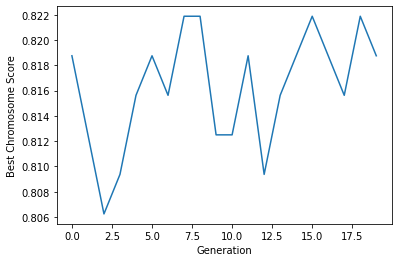

In [22]:
GA.plot()

It can be seen that as the generation increases, the accuracy of the best chromosome of each generation has a rising trend. However, It seems that the accuracy score has a clear ceiling of about 0.822. This can be due to a number of reasons:

1. The dataset.
The dataset itself is a very small dataset. It has only 1599 samples and 11 variables that describe the target variable. Since the genetic algorithm decides on which variable to use for its fitness evaluation, 11 variables don't have a lot of diversity.

2. Correlation between variables.
From the correlation matrix below, it can be seen that not much variables have a high correlation. If many variables had higher correlations, the genetic algorithm may have found better combinations of variables that increase the accuracy overall.

In [24]:
corr = GA.data.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595
